In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

import sklearn.datasets as data
import pandas as pd
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
df=pd.read_csv("C:\\Users\\Manish\\Downloads\\Mall_Customers (1).csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
std_scaler = StandardScaler()
scale_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
df[scale_columns] = std_scaler.fit_transform(df[scale_columns])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,-1.424569,-1.738999,-0.434801
1,2,Male,-1.281035,-1.738999,1.195704
2,3,Female,-1.352802,-1.700830,-1.715913
3,4,Female,-1.137502,-1.700830,1.040418
4,5,Female,-0.563369,-1.662660,-0.395980


In [4]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']].copy()
X.columns = ['Age', 'Income', 'Score']
X['Gender'] = df['Gender'] == 'Male'
X.astype(float).head()


,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,1.0
1,-1.281035,-1.738999,1.195704,1.0
2,-1.352802,-1.700830,-1.715913,0.0
3,-1.137502,-1.700830,1.040418,0.0
4,-0.563369,-1.662660,-0.395980,0.0


# TASK - 1

### K-MEANS

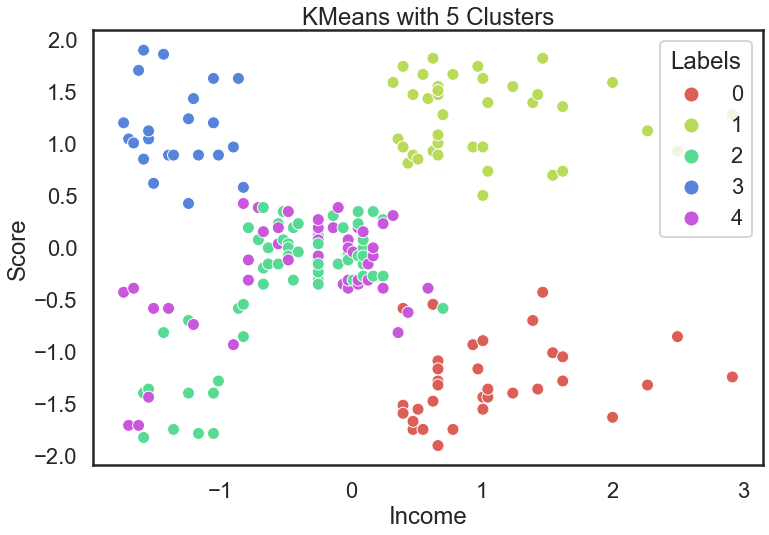

In [5]:
from sklearn.cluster import KMeans 

df = df[scale_columns]

km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans with 5 Clusters')
plt.show()

### DBSCAN

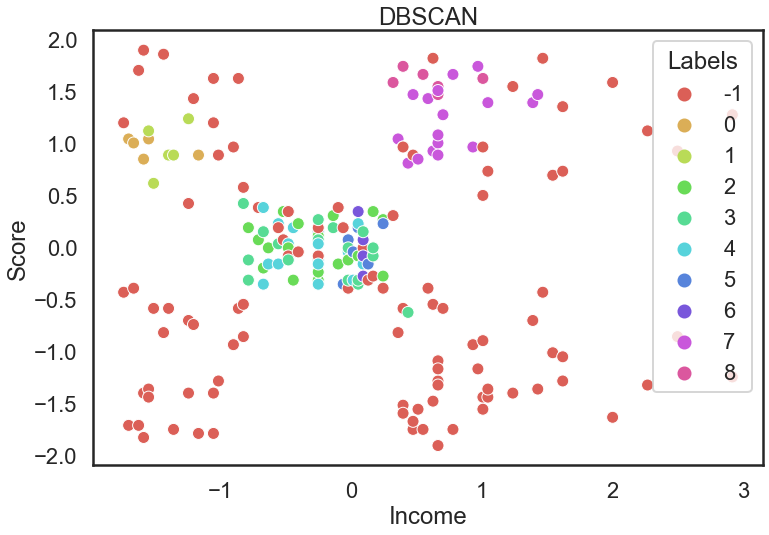

In [6]:
from sklearn.cluster import DBSCAN 

db = DBSCAN().fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

### ALGOMERATIVE CLUSTERING

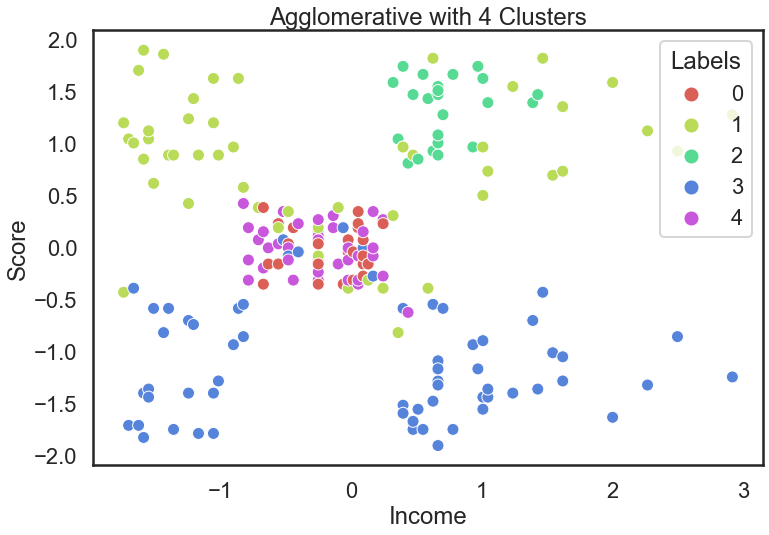

In [7]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative with 4 Clusters')
plt.show()

### HDBSCAN 

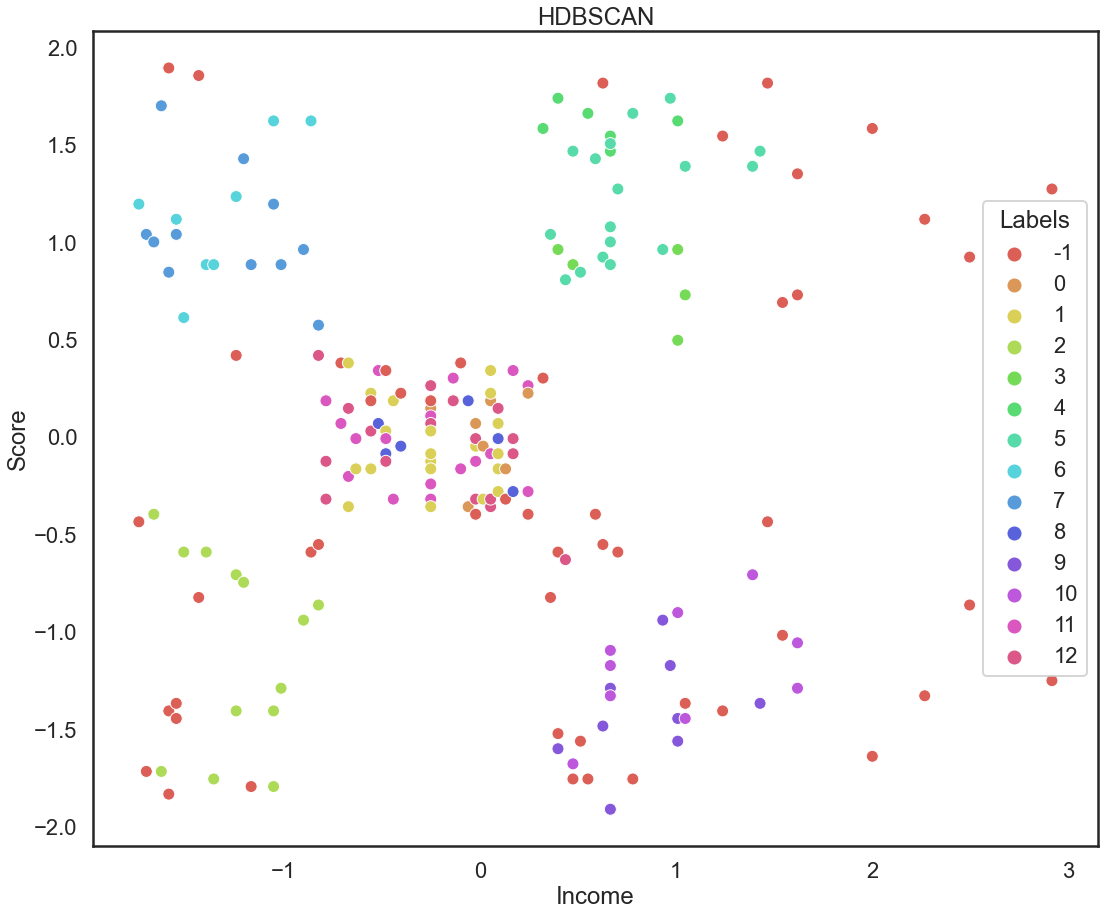

In [8]:
import hdbscan

hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_clus.fit(X)
X['Labels'] = hdbscan_clus.labels_
plt.figure(figsize=(18, 15))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
plt.title('HDBSCAN')
plt.show()

# TASK - 2

## CONCLUSION: 

The results of all the clustering algorithms are different as compared with each other, where k means shows a better visual with all the clusters and outliers and dbscan Aglomerative, hdbscan are performing a little good for analyzing the clusters as well as outliers

AS PER ALL THE ALGORITHMS K-MEANS PERFORMS THE BEST AND THE IN THIS ALGORITHM ALSO PROVIDE A CLEAR VISUAL WITH THE CLUSTERS AND OUTLIERS


One of the good thing about K-MEANS is it is easy to understand and easy to use.

On another hand it has an disadvantage it takes all data points into consideration while creating a centroid

Outliers have been neglected, and clusters are complex with different densities and nested clusters.

Selecting the K value is also a challenging job without performing a sillhouette score or elbow score.

Each clusters has equal number of samples.

Scaling is important if we dont scale the data then the clusters which have been produced wil be more complex.

The advantage of using DBSCAN is it identifies the outliers.

In k-Means number of clusters are not needed to specify.

K-MEANS is able to handle large dataset easily but it is not able to handle big differnces in densities.

It works well with even clusters sizes, as it doesn't justify to disturbance.

Agglomerative is not sulitable for large datasets.

In agglomerative it is mandatory to define the number of clusters.

The best thing about hdbscan is that it works good with the large number of differences in densities in datasets.

Hdbscan is able to handle the large datasets easily.

It is not mandatory to specify number of clusters in hdbscan

It also identifies outliers in datasets